# Лабараторная работа 1

Код парсера находится на GitHub рядом с task1.ipynb - sg_parser.py


## Часть 2 - анализ текстовых данных

In [30]:
!pip install natasha
!pip install nltk

In [2]:
import sqlite3

In [47]:
conn = sqlite3.connect('/content/articles.db')
CURSOS = conn.cursor()
CURSOS.execute('''SELECT title FROM articles LIMIT 20''')
titles = CURSOS.fetchall()
CURSOS.execute('''SELECT body FROM articles LIMIT 20''')
texts = CURSOS.fetchall()

Провести аналитику текстовых данных.

1. Токенезировать и лемматизировать полученные текстовые данные полученные из 1 части задания

- Токенизация - разделение слов на предложения
- Лемматизация - перевод слов в начальную форму

2. Посчитать наиболее встречающиеся пары подлежащих и сказуемых
3. Посчитать самые популярные слова (исключая стоп-слова, словарь стоп слов можно найти в nltk, либо отбросить по частям речи)
4. Вывести статистику (по убыванию, наиболее встречающеся пары и самые популярные слова за исключением стоп-слов)

In [44]:
data = dict(zip(titles, texts)) # p.s. здесь вы открываете полученные данные

# Для примера можно использовать natasha
# !pip install natasha


from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    NamesExtractor,

    Doc
)

segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

# Токенизация

In [45]:
from ipymarkup import show_dep_ascii_markup as show_markup
articles = list(data.values())
article = articles[10]


doc = Doc(str(article))
doc.segment(segmenter)
doc.parse_syntax(syntax_parser)
doc.tag_morph(morph_tagger)

for sentence in doc.sents: # получаем предложения
  sentence.syntax.print()

              ┌────────► (              punct
              │ ┌──────► '              punct
              │ │ ┌────► Если           mark
              │ │ │ ┌──► вам            iobj
              │ │ │ │ ┌► когда-нибудь   advmod
┌─┌─┌───────┌►└─└─└─└─└─ хотелось       advcl
│ │ │ ┌───┌►│       ┌─┌─ попробовать    xcomp
│ │ │ │   │ │       │ └► себя           obj
│ │ │ │   │ │       │ ┌► в              case
│ │ │ │   │ │       └►└─ роли           obl
│ │ │ │   │ │       │ ┌► средневекового amod
│ │ │ │   │ │       └►└─ командира      nmod
│ │ │ │   │ └─────┌─└──► войска         nmod
│ │ │ │   │       │ ┌──► ,              punct
│ │ │ │   │       │ │ ┌► что            mark
│ │ │ │ ┌─└───────└►└─└─ готов          acl
│ │ │ │ │           └►┌─ жертвовать     xcomp
│ │ │ │ │             └► собой          iobj
│ │ │ │ │             ┌► ради           case
│ │ │ └►│           ┌─└─ спасения       obl
│ │ │   │           │ ┌► и              cc
│ │ │   │         ┌─└►└─ защиты         conj
│ │ │   

# Токенизация

In [40]:
for sentence in doc.sents:
  for token in sentence.tokens: # получаем токены
    print(token)

DocToken(stop=1, text='(', id='1_1', head_id='1_6', rel='punct', pos='PUNCT')
DocToken(start=1, stop=2, text="'", id='1_2', head_id='1_6', rel='punct', pos='PUNCT')
DocToken(start=2, stop=6, text='Если', id='1_3', head_id='1_6', rel='mark', pos='SCONJ')
DocToken(start=7, stop=10, text='вам', id='1_4', head_id='1_6', rel='iobj', pos='PRON', feats=<Dat,Plur,2>)
DocToken(start=11, stop=23, text='когда-нибудь', id='1_5', head_id='1_6', rel='advmod', pos='ADV', feats=<Pos>)
DocToken(start=24, stop=32, text='хотелось', id='1_6', head_id='1_13', rel='advcl', pos='VERB', feats=<Imp,Neut,Ind,Sing,Past,Fin,Mid>)
DocToken(start=33, stop=44, text='попробовать', id='1_7', head_id='1_16', rel='xcomp', pos='VERB', feats=<Perf,Inf,Act>)
DocToken(start=45, stop=49, text='себя', id='1_8', head_id='1_7', rel='obj', pos='PRON', feats=<Acc>)
DocToken(start=50, stop=51, text='в', id='1_9', head_id='1_10', rel='case', pos='ADP')
DocToken(start=52, stop=56, text='роли', id='1_10', head_id='1_7', rel='obl', po

In [41]:
print("Слово\tЛемма")

for sentence in doc.sents:
  for token in sentence.tokens:
    token.lemmatize(morph_vocab)
  lemmatized = {_.text: _.lemma for _ in sentence.tokens}
  print(lemmatized.items())

Слово	Лемма
dict_items([('(', '('), ("'", "'"), ('Если', 'если'), ('вам', 'вы'), ('когда-нибудь', 'когда-нибудь'), ('хотелось', 'хотеться'), ('попробовать', 'попробовать'), ('себя', 'себя'), ('в', 'в'), ('роли', 'роль'), ('средневекового', 'средневековый'), ('командира', 'командир'), ('войска', 'войско'), (',', ','), ('что', 'что'), ('готов', 'готовый'), ('жертвовать', 'жертвовать'), ('собой', 'себя'), ('ради', 'ради'), ('спасения', 'спасение'), ('и', 'и'), ('защиты', 'защита'), ('мирных', 'мирный'), ('жителей', 'житель'), ('тогда', 'тогда'), ('эта', 'этот'), ('игра', 'игра'), ('для', 'для'), ('вас', 'вы'), ('.', '.')])
dict_items([('Не', 'не'), ('обманитесь', 'обмануться'), ('минималистичной', 'минималистичный'), ('графикой', 'графика'), ('и', 'и'), ('ярким', 'яркий'), ('визуалом', 'визуал'), ('–', '–'), ('на', 'на'), ('деле', 'дело'), ('всё', 'весь'), ('будет', 'быть'), ('не', 'не'), ('так', 'так'), ('просто', 'простой'), (',', ','), ('как', 'как'), ('может', 'мочь'), ('показаться', 

Разделяем на подлежащие и сказуемые

In [51]:
nsubj = ''
root = ''
pairs = {}
for sentence in doc.sents:
  nsubj = ''
  root = ''
  for token in sentence.tokens:
    token.lemmatize(morph_vocab)

    if token.rel == "nsubj":
      nsubj = token.lemma
    if token.rel == 'root':
      root = token.lemma
    if nsubj and root:
      pairs[nsubj] = root

print(pairs)

{'это': 'стать', 'место': 'можно', 'я': 'стать', 'глава': 'знаменовать', 'вплести': 'можно', 'подножие': 'можно', 'мы': 'часть', 'отрезок': 'можно', 'он': 'побегать', 'героиня': 'задавать', 'вы': 'пройти', 'пол': 'оказываться', 'человек': 'оказываться', 'конфликт': 'решить', 'гора': 'ждать', 'начало': 'добавлять', 'селеста': 'заспавнить', 'весь': 'уметь', 'возможность': 'душнить', 'она': 'восприниматься', 'кто': 'запретить', 'игра': 'знакомить', 'бородатый': 'добряк', 'селест': 'начать', 'отражение': 'привлечь', 'что': 'успеть', 'сторона': 'пытаться', 'обратный': 'привлечь', 'десяток': 'предстоять', 'клетка': 'мочь', 'сон': 'снять', 'ты': 'преодолеть', 'холостяк': 'забираться', 'который': 'знаменовать', 'локация': 'отражать', 'отель': 'стать', 'господин': 'стать', 'владелец': 'вкратце', 'тот': 'бояться', 'персонаж': 'вызывать', 'персонал': 'вызывать', 'оширо': 'успеть', 'отступление': 'успеть', 'ее': 'пытаться', 'призрак': 'побегать', 'кряж': 'встретить', 'рухлядь': 'отказаться', 'атак

In [53]:
all_pairs = []
for article in articles:
  doc = Doc(str(article))
  doc.segment(segmenter)
  doc.parse_syntax(syntax_parser)
  doc.tag_morph(morph_tagger)
  for sentence in doc.sents:
    nsubj = ''
    root = ''
    for token in sentence.tokens:
      token.lemmatize(morph_vocab)

      if token.rel == "nsubj":
        nsubj = token.lemma
      if token.rel == 'root':
        root = token.lemma
      if nsubj and root:
        all_pairs.append((nsubj, root))

In [56]:
from collections import Counter


pairs_count = Counter(all_pairs)
pairs_count

Counter({('нечисть', 'стратегия'): 7,
         ('название', 'стать'): 36,
         ('дата', 'стать'): 46,
         ('кампания', 'стать'): 4,
         ('задача', 'стать'): 5,
         ('выбор', 'стать'): 8,
         ('игрок', 'стать'): 1,
         ('игрок', 'должный'): 33,
         ('декбилдинга', 'позволять'): 12,
         ('поле', 'позволять'): 3,
         ('карта', 'позволять'): 9,
         ('каждый', 'позволять'): 16,
         ('покупка', 'осуществляться'): 5,
         ('который', 'осуществляться'): 8,
         ('очки', 'осуществляться'): 3,
         ('туман', 'осуществляться'): 4,
         ('механика', 'осуществляться'): 12,
         ('радиус', 'составлять'): 7,
         ('они', 'необходимый'): 18,
         ('юнит', 'иметь'): 5,
         ('цель', 'иметь'): 7,
         ('цель', 'победить'): 14,
         ('ход', 'разделить'): 4,
         ('ход', 'момент'): 3,
         ('вы', 'момент'): 13,
         ('игрок', 'ходить'): 6,
         ('очередь', 'наступать'): 1,
         ('враг', 'насту

In [57]:
pairs_count.most_common(10)

[(('я', 'думать'), 309),
 (('я', 'мочь'), 282),
 (('вы', 'мочь'), 263),
 (('я', 'хотеть'), 256),
 (('мы', 'мочь'), 230),
 (('это', 'мочь'), 191),
 (('который', 'быть'), 183),
 (('игрок', 'мочь'), 168),
 (('я', 'видеть'), 168),
 (('вы', 'быть'), 162)]

Самыми популярными парами подлежащих и сказуемых предсказуемо являются местоимения с глаголами "быть", "мочь". Также, пользователи Стопгейма, предположительно,  думают (но это не точно).

In [62]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
filtered = []
punct = ['(', ')', ',', '.', '?', '!', '«', '»', '—', '"', ':', ';', '-', '–', '\\', '1', '2', '3', '4', '5', '6', '7', '9', '0']
for article in articles:
  doc = Doc(str(article))
  doc.segment(segmenter)
  doc.parse_syntax(syntax_parser)
  doc.tag_morph(morph_tagger)
  for sentence in doc.sents:
    for token in sentence.tokens:
      token.lemmatize(morph_vocab)
      if token.lemma not in stop_words and token.lemma not in punct:
        filtered.append(token.lemma)

In [77]:
words_count = Counter(filtered)
words_count.most_common(50)

[('это', 1454),
 ('игра', 1231),
 ('который', 943),
 ('весь', 941),
 ('свой', 511),
 ('мочь', 468),
 ('год', 360),
 ('время', 307),
 ('очень', 260),
 ('персонаж', 260),
 ('игрок', 256),
 ('просто', 250),
 ('человек', 246),
 ('первый', 241),
 ('хороший', 226),
 ('нужный', 197),
 ('также', 194),
 ('новый', 193),
 ('часть', 192),
 ('история', 186),
 ('самый', 186),
 ('каждый', 182),
 ('мир', 182),
 ('стать', 179),
 ('уровень', 166),
 ('враг', 162),
 ('сделать', 162),
 ('момент', 156),
 ('хотеть', 153),
 ('делать', 153),
 ('серия', 153),
 ('проблема', 142),
 ('большой', 137),
 ('интересный', 131),
 ('работать', 130),
 ('играть', 129),
 ('главный', 127),
 ('поэтому', 127),
 ('иметь', 126),
 ('дело', 126),
 ('консоль', 126),
 ('сказать', 124),
 ('сторона', 122),
 ('ваш', 117),
 ('второй', 117),
 ('должный', 116),
 ('конец', 116),
 ('являться', 115),
 ('вид', 113),
 ('хотя', 112)]

Вывод: NLTK-шный набор стоп-слов довольно бедный

# Визуализация

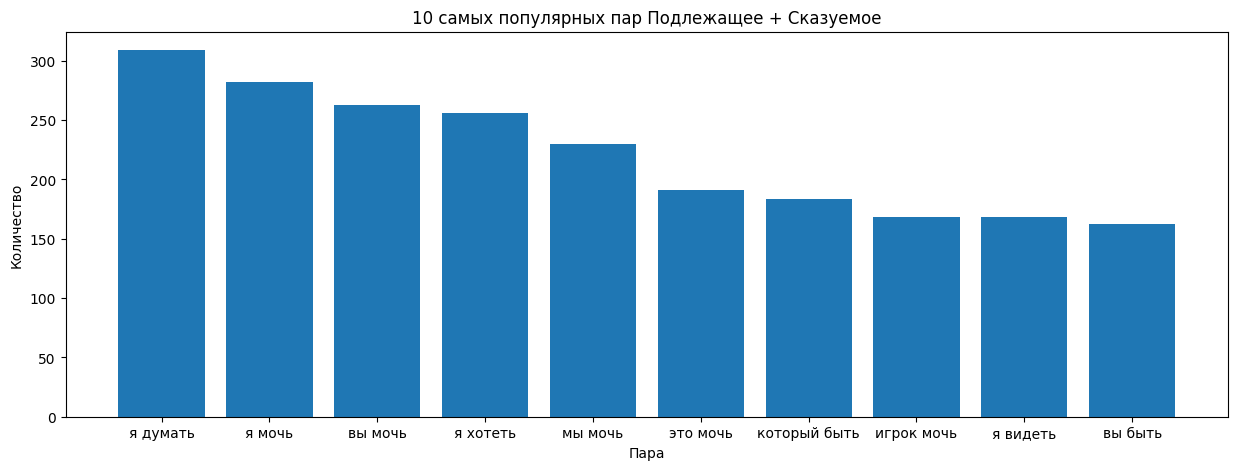

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
data = DataFrame()
pair = [(i[0][0] + ' ' + i[0][1]) for i in pairs_count.most_common(10)]
count = [i[1] for i in pairs_count.most_common(10)]

data["Pair"] = pair
data["Count"] = count
fig, ax = plt.subplots(figsize=(15, 5))

plt.bar(data["Pair"], data["Count"])
plt.title("10 самых популярных пар Подлежащее + Сказуемое")
plt.ylabel("Количество")
plt.xlabel("Пара")
plt.show()

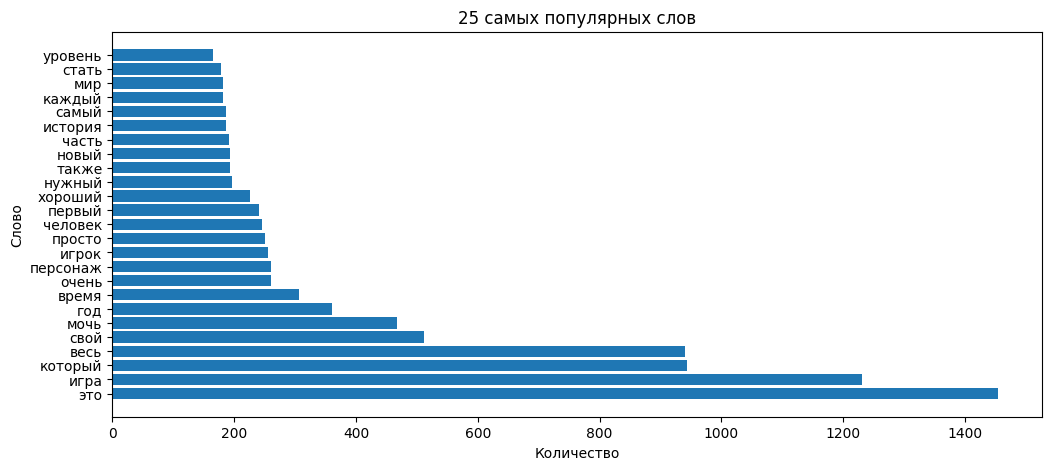

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
data = DataFrame()
word = [i[0] for i in words_count.most_common(25)]
count = [i[1] for i in words_count.most_common(25)]

data["Word"] = word
data["Count"] = count
fig, ax = plt.subplots(figsize=(12, 5))

plt.barh(data["Word"], data["Count"])
plt.title("25 самых популярных слов")
plt.ylabel("Слово")
plt.xlabel("Количество")
plt.show()